In [ ]:
'''
    In that notebook I'm going to merge imdb data with netflix data to show movies' ratings
'''

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
imdb_movies = pd.read_csv('../Data/IMDb movies.csv', low_memory=False)
imdb_ratings = pd.read_csv('../Data/IMDb ratings.csv', low_memory=False)

In [4]:
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [6]:
movies = imdb_movies[['imdb_title_id', 'original_title']]
ratings = imdb_ratings[['imdb_title_id', 'weighted_average_vote']]

In [7]:
movies.head()

,imdb_title_id,original_title
0,tt0000009,Miss Jerry
1,tt0000574,The Story of the Kelly Gang
2,tt0001892,Den sorte drøm
3,tt0002101,Cleopatra
4,tt0002130,L'Inferno


In [8]:
ratings.head()

,imdb_title_id,weighted_average_vote
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0


In [9]:
imdb_df = pd.concat([movies, ratings], axis=1)
imdb_df.head()

,imdb_title_id,original_title,imdb_title_id,weighted_average_vote
0,tt0000009,Miss Jerry,tt0000009,5.9
1,tt0000574,The Story of the Kelly Gang,tt0000574,6.1
2,tt0001892,Den sorte drøm,tt0001892,5.8
3,tt0002101,Cleopatra,tt0002101,5.2
4,tt0002130,L'Inferno,tt0002130,7.0


In [11]:
imdb_df = imdb_df.iloc[:, [0,1,3]]
imdb_df.head()

,imdb_title_id,original_title,weighted_average_vote
0,tt0000009,Miss Jerry,5.9
1,tt0000574,The Story of the Kelly Gang,6.1
2,tt0001892,Den sorte drøm,5.8
3,tt0002101,Cleopatra,5.2
4,tt0002130,L'Inferno,7.0


In [12]:
netflix_df = pd.read_csv('../Data/cleaned_data.csv')
netflix_df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description
0,0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
imdb_df = imdb_df.rename(columns={'imdb_title_id': 'imdb_id', 'original_title': 'title', 'weighted_average_vote': 'rating'})

In [17]:
imdb_df.head()

,imdb_id,title,rating
0,tt0000009,Miss Jerry,5.9
1,tt0000574,The Story of the Kelly Gang,6.1
2,tt0001892,Den sorte drøm,5.8
3,tt0002101,Cleopatra,5.2
4,tt0002130,L'Inferno,7.0


In [18]:
final_data = pd.merge(netflix_df, imdb_df, how='inner', on='title')
final_data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description,imdb_id,rating
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,tt5979312,6.0
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tt2100376,4.6
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",tt0342012,7.7
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",tt0472033,7.1
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,tt0478087,6.8


In [20]:
final_data.shape

(3705, 15)

In [21]:
missing_values_count = final_data.isnull().sum()
missing_values_count

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
age_rating      0
duration        0
listed_in       0
description     0
imdb_id         0
rating          0
dtype: int64

In [23]:
final_data = final_data.drop_duplicates(subset=['title'])
final_data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description,imdb_id,rating
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,tt5979312,6.0
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tt2100376,4.6
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",tt0342012,7.7
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,tt0478087,6.8
5,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01 00:00:00,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",tt7867670,6.8


In [24]:
final_data.shape

(2893, 15)

In [25]:
final_data = final_data.sort_values('rating', ascending=False)
final_data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description,imdb_id,rating
3157,6616,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,tt0167260,8.9
2293,5002,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01 00:00:00,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,tt0110912,8.9
2516,5430,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01 00:00:00,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,tt0108052,8.9
1430,2979,s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2020-01-01 00:00:00,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",tt1375666,8.8
3158,6617,s6618,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,tt0167261,8.7


In [26]:
final_data.head(10)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description,imdb_id,rating
3157,6616,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,tt0167260,8.9
2293,5002,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01 00:00:00,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,tt0110912,8.9
2516,5430,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01 00:00:00,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,tt0108052,8.9
1430,2979,s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2020-01-01 00:00:00,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",tt1375666,8.8
3158,6617,s6618,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,tt0167261,8.7
3172,6648,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,2019-11-01 00:00:00,1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,tt0133093,8.7
928,1932,s1933,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2017-12-01 00:00:00,2015,TV-14,124 min,"Dramas, International Movies",Driven by the lessons he learned from his moth...,tt4280824,8.6
2141,4690,s4691,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,2019-11-04 00:00:00,2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",tt10370116,8.6
1630,3442,s3443,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,2019-12-31 00:00:00,1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...,tt0215911,8.6
1169,2463,s2464,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,2019-12-31 00:00:00,1979,TV-PG,137 min,"Classic Movies, Comedies, International Movies",When circumstances at work compel Ram to prete...,tt0079221,8.6


In [27]:
top_ratings = final_data[final_data.rating >= 8.5]
top_ratings

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description,imdb_id,rating
3157,6616,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,tt0167260,8.9
2293,5002,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01 00:00:00,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,tt0110912,8.9
2516,5430,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01 00:00:00,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,tt0108052,8.9
1430,2979,s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2020-01-01 00:00:00,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",tt1375666,8.8
3158,6617,s6618,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01 00:00:00,2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,tt0167261,8.7
3172,6648,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,2019-11-01 00:00:00,1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,tt0133093,8.7
928,1932,s1933,Movie,Eh Janam Tumhare Lekhe,Harjit Singh,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",India,2017-12-01 00:00:00,2015,TV-14,124 min,"Dramas, International Movies",Driven by the lessons he learned from his moth...,tt4280824,8.6
2141,4690,s4691,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,2019-11-04 00:00:00,2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",tt10370116,8.6
1630,3442,s3443,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,2019-12-31 00:00:00,1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...,tt0215911,8.6
1169,2463,s2464,Movie,Gol Maal,Hrishikesh Mukherjee,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",India,2019-12-31 00:00:00,1979,TV-PG,137 min,"Classic Movies, Comedies, International Movies",When circumstances at work compel Ram to prete...,tt0079221,8.6


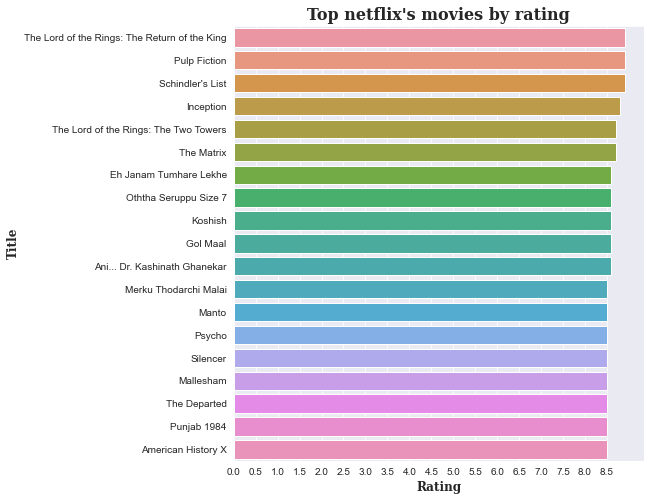

In [44]:
fontdict = {'family': 'serif',
            'weight': 'bold',
            'size': 16 
            }

fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }


plt.figure(figsize=(10,8))
sns.barplot(data=top_ratings, x='rating', y='title')
sns.set_style('darkgrid')
plt.title("Top netflix's movies by rating", fontdict=fontdict)
plt.ylabel('Title', fontdict=fontdict_smaller)
plt.xlabel('Rating', fontdict=fontdict_smaller)
plt.xticks(np.arange(0, 9, 0.5))
plt.rcParams['savefig.facecolor'] = 'white'
plt.subplots_adjust(left=0.33)
plt.savefig('../Graphs/ratings_top_movies.png', dpi = 800)
plt.show()

In [31]:
directors = top_ratings['director'].value_counts().reset_index()
directors

,index,director
0,Peter Jackson,2
1,Harjit Singh,1
2,Tony Kaye,1
3,Parthiban,1
4,Nandita Das,1
5,Lenin Bharathi,1
6,Christopher Nolan,1
7,Gulzar,1
8,Raj R,1
9,Quentin Tarantino,1


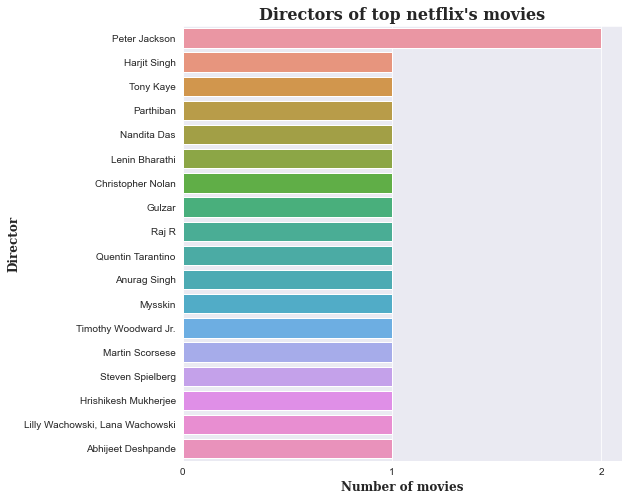

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(data=directors, x='director', y='index')
sns.set_style('darkgrid')
plt.title("Directors of top netflix's movies", fontdict=fontdict)
plt.ylabel('Director', fontdict=fontdict_smaller)
plt.xlabel('Number of movies', fontdict=fontdict_smaller)
plt.xticks(np.arange(0, 2.1, 1))
plt.rcParams['savefig.facecolor'] = 'white'
plt.subplots_adjust(left=0.29)
plt.savefig('../Graphs/ratings_top_directors.png', dpi = 800)
plt.show()

In [35]:
countries = top_ratings['country'].value_counts().reset_index()
countries

,index,country
0,India,9
1,United States,5
2,"New Zealand, United States",2
3,"United States, Hong Kong",1
4,"United States, United Kingdom",1
5,"Canada, India",1


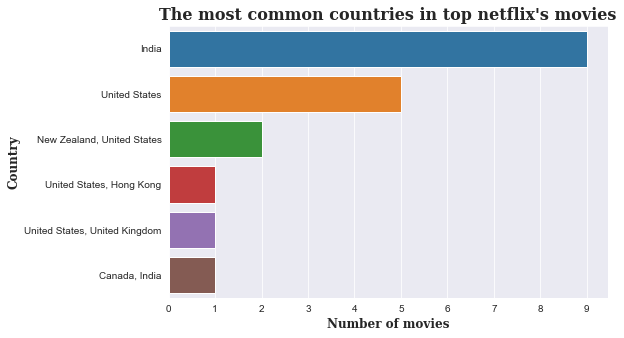

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=countries, x='country', y='index')
sns.set_style('darkgrid')
plt.title("The most common countries in top netflix's movies", fontdict=fontdict)
plt.ylabel('Country', fontdict=fontdict_smaller)
plt.xlabel('Number of movies', fontdict=fontdict_smaller)
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['savefig.facecolor'] = 'white'
plt.subplots_adjust(left=0.29)
plt.savefig('../Graphs/ratings_top_countries.png', dpi = 800)
plt.show()

In [45]:
years = top_ratings['release_year'].value_counts().reset_index()
years

,index,release_year
0,2018,4
1,2019,2
2,2020,1
3,1993,1
4,1994,1
5,1998,1
6,1999,1
7,2002,1
8,2003,1
9,1972,1


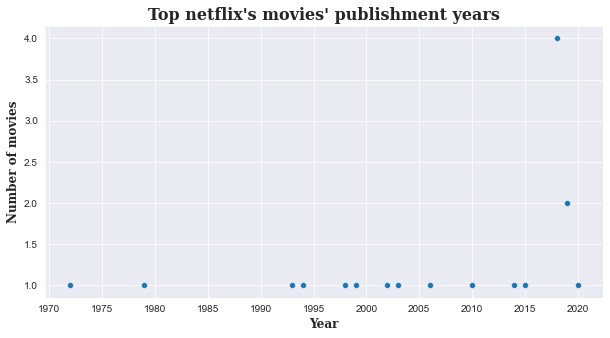

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=years, x='index', y='release_year')
sns.set_style('darkgrid')
plt.title("Top netflix's movies' publishment years", fontdict=fontdict)
plt.ylabel('Number of movies', fontdict=fontdict_smaller)
plt.xlabel('Year', fontdict=fontdict_smaller)
plt.xticks(np.arange(1970, 2021, 5))
plt.rcParams['savefig.facecolor'] = 'white'
#plt.subplots_adjust(left=0.29)
plt.savefig('../Graphs/ratings_years.png', dpi = 800)
plt.show()